In [2]:
from datasets import load_dataset
import pandas as pd
import numpy as np
from collections import Counter
from geotext import GeoText
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
import nltk

In [3]:
dataset = load_dataset("pile-of-law/pile-of-law", 'r_legaladvice', trust_remote_code=True)
train_dataset = dataset['train']
test_dataset = dataset['validation']

README.md:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

c:\Users\Zachary Daniels\anaconda3\envs\ml\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Zachary Daniels\.cache\huggingface\hub\datasets--pile-of-law--pile-of-law. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pile-of-law.py:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Loading Dataset Infos from C:\Users\Zachary Daniels\.cache\huggingface\modules\datasets_modules\datasets\pile-of-law--pile-of-law\c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60
Generating dataset pile-of-law (C:/Users/Zachary Daniels/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60)


train.r_legaldvice.jsonl.xz:   0%|          | 0.00/61.5M [00:00<?, ?B/s]

Checksum Computation took 0.0 min


validation.r_legaldvice.jsonl.xz:   0%|          | 0.00/20.7M [00:00<?, ?B/s]

Checksum Computation took 0.0 min
Generating train split


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split


Generating validation split: 0 examples [00:00, ? examples/s]

Unable to verify splits sizes.
Dataset pile-of-law downloaded and prepared to C:/Users/Zachary Daniels/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60. Subsequent calls will reuse this data.


In [6]:
# Convert dataset to pandas DataFrame
train_df = pd.DataFrame(train_dataset)
test_df = pd.DataFrame(test_dataset)

print('TRAIN DATASET')
# Display the first few rows of the DataFrame
print(train_df.head())

# Get a summary of statistics for numerical columns (if any)
print(train_df.describe())

# Get information about the DataFrame (e.g., column types, non-null counts)
print(train_df.info())

TRAIN DATASET
                                                text created_timestamp  \
0  Title: Landlord broke lease agreement, what ar...        10-25-2016   
1  Title: I think someone is breaking into my car...        11-03-2018   
2  Title: MA - Just found out I might not be able...        08-25-2017   
3  Title: I adopted a dog. They said they gave me...        04-24-2019   
4  Title: (New Jersey) Denied haircut at a Barber...        10-27-2018   

  downloaded_timestamp                                                url  
0           11-09-2021  https://www.reddit.com/r/legaladvice/comments/...  
1           09-28-2021  https://www.reddit.com/r/legaladvice/comments/...  
2           10-02-2021  https://www.reddit.com/r/legaladvice/comments/...  
3           09-27-2021  https://www.reddit.com/r/legaladvice/comments/...  
4           09-28-2021  https://www.reddit.com/r/legaladvice/comments/...  
                                                     text created_timestamp  \
count 

In [7]:
print('TEST DATASET')
# Display the first few rows of the DataFrame
print(test_df.head())

# Get a summary of statistics for numerical columns (if any)
print(test_df.describe())

# Get information about the DataFrame (e.g., column types, non-null counts)
print(test_df.info())

TEST DATASET
                                                text created_timestamp  \
0  Title: I was speeding, do I still plead not gu...        03-03-2016   
1  Title: Friend in College cut off from parents,...        06-12-2018   
2  Title: Scammed out of a $50,000 investment...\...        10-16-2018   
3  Title: Is there anyone here that knows militar...        12-06-2015   
4  Title: In Seattle for a few days with a rental...        08-11-2017   

  downloaded_timestamp                                                url  
0           11-10-2021  https://www.reddit.com/r/legaladvice/comments/...  
1           09-30-2021  https://www.reddit.com/r/legaladvice/comments/...  
2           09-29-2021  https://www.reddit.com/r/legaladvice/comments/...  
3           11-10-2021  https://www.reddit.com/r/legaladvice/comments/...  
4           10-02-2021  https://www.reddit.com/r/legaladvice/comments/...  
                                                     text created_timestamp  \
count  

In [8]:
def extract_location_geotext(text):
    places = GeoText(text)
    return places.cities[0] if places.cities else None  # Keep only the first location found

def extract_location_info(dataset):
    locations = []

    for entry in dataset:
        text = entry.get('text', '')  # Get text, default to empty string if missing
        match = extract_location_geotext(text)

        if match:
            locations.append(match)

    return locations

def count_location_instances(dataset):
    locations = extract_location_info(dataset)
    return Counter(locations)

locations = extract_location_info(train_dataset)
location_counts = count_location_instances(train_dataset)
print(location_counts)  # Output: Counter({'New York': X, 'Los Angeles': Y, 'Chicago': Z})

Counter({'Texas': 3624, 'Florida': 2952, 'Most': 2135, 'New York': 1693, 'Of': 1482, 'Michigan': 1362, 'Ontario': 1308, 'Virginia': 1307, 'Police': 1264, 'Colorado': 1085, 'Oregon': 1019, 'March': 938, 'Washington': 938, 'Missouri': 756, 'Best': 748, 'Maryland': 716, 'Los Angeles': 645, 'Chicago': 622, 'University': 506, 'Oklahoma': 503, 'Iowa': 453, 'Kansas': 361, 'Same': 361, 'Federal': 340, 'Seattle': 299, 'Houston': 270, 'Boston': 263, 'San Diego': 252, 'San Francisco': 234, 'Atlanta': 229, 'Toronto': 213, 'Austin': 208, 'Philadelphia': 206, 'Montana': 198, 'Las Vegas': 197, 'Man': 187, 'Bay': 175, 'Portland': 170, 'Denver': 168, 'Along': 166, 'Dallas': 161, 'Much': 154, 'Delaware': 152, 'Bar': 127, 'Buy': 127, 'Phoenix': 122, 'Brooklyn': 120, 'London': 119, 'Miami': 109, 'Male': 102, 'Cali': 94, 'Vancouver': 93, 'Union': 92, 'Pittsburgh': 85, 'Reading': 85, 'Orlando': 84, 'Baltimore': 83, 'York': 78, 'Minneapolis': 78, 'Nice': 76, 'Victoria': 76, 'Columbus': 74, 'Manhattan': 73, '

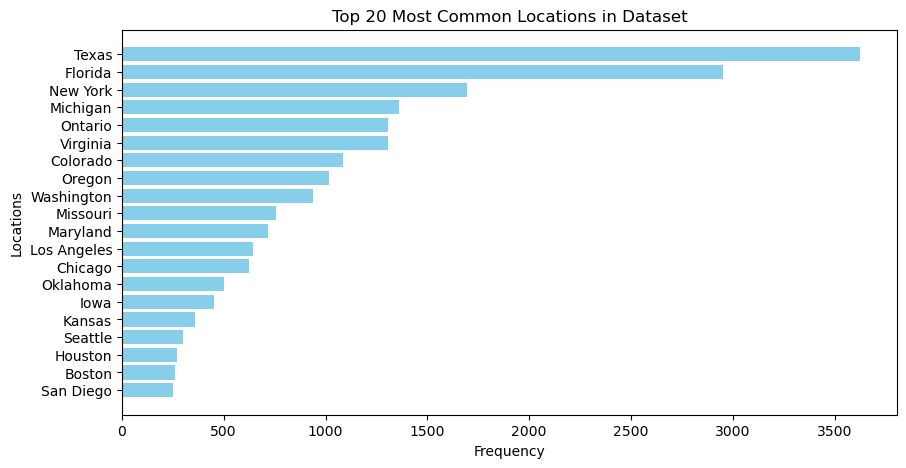

In [12]:
def plot_location_bar_chart(dataset):
    location_counts = count_location_instances(dataset)
    filtered_location_counts = {location: count for location, count in location_counts.items() if count > 200 and location not in ['March', 'Man', 'Male', 'Most', 'Of', 'Best', 'Bar', 'Same', 'Along', 'Peace', 'Federal', 'Police', 'University']}

    if not filtered_location_counts:
        print("No location appears more than once.")
        return

    # Sort by count in descending order and keep only the top 20
    sorted_location_counts = dict(sorted(filtered_location_counts.items(), key=lambda item: item[1], reverse=True)[:20])

    locations, counts = zip(*sorted_location_counts.items())

    plt.figure(figsize=(10, 5))
    plt.barh(locations, counts, color='skyblue')
    plt.xlabel("Frequency")
    plt.ylabel("Locations")
    plt.title("Top 20 Most Common Locations in Dataset")
    plt.gca().invert_yaxis()
    plt.show()

# Example usage:
plot_location_bar_chart(train_dataset)


[nltk_data] Downloading package stopwords to C:\Users\Zachary
[nltk_data]     Daniels\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Zachary Daniels\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to C:\Users\Zachary
[nltk_data]     Daniels\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to C:\Users\Zachary
[nltk_data]     Daniels\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


['landlord', 'car', 'lot', 'dog', 'hair', 'child', 'paycheck', 'airport', 'edit', 'gt', 'coworker', 'case', 'opinions', 'classes', 'friend', 'girlfriend', 'mom', 'friend', 'property', 'night', 'dog', 'release', 'cousin', 'car', 'books', 'lights', 'job', 'rx', 'relationship', 'summons', 'partnership', 'cemetery', 'wife', 'registration', 'court', 'suspension', 'record', 'shepherd', 'college', 'building', 'pets', 'store', 'poster', 'property', 'dj', 'talk', 'letter', 'job', 'death', 'contract', 'electricity', 'case', 'report', 'caught', 'police', 'price', 'details', 'room', 'stuff', 'glasses', 'maternity', 'check', 'receptionists', 'car', 'name', 'posts', 'house', 'company', 'insurance', 'company', 'car', 'school', 'cps', 'visits', 'car', 'phone', 'sign', 'driver', 'vaccines', 'cps', 'insurance', 'rehearsal', 'messages', 'rent', 'hours', 'pension', 'life', 'unemployment', 'school', 'clock', 'extension', 'lease', 'company', 'volunteer', 'husband', 'stepdad', 'cops', 'guidance', 'phone', 's

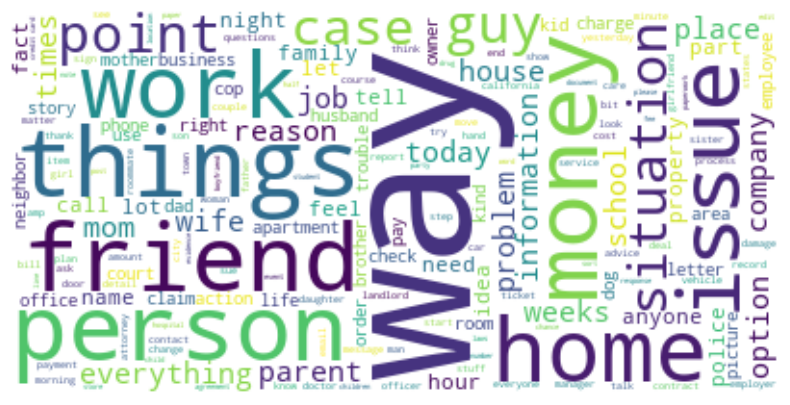

In [13]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('punkt_tab')

def extract_text_before_answer(text):
    return text.split('Answer')[0].strip() if 'Answer' in text else text

def extract_location_geotext(text):
    places = GeoText(text)
    return places.cities[0] if places.cities else None  # Keep only the first location found

def extract_location_info(dataset):
    locations = []

    for entry in dataset:
        text = extract_text_before_answer(entry.get('text', ''))  # Extract text before 'Answer'
        match = extract_location_geotext(text)

        if match:
            locations.append(match)

    return locations

def count_location_instances(dataset):
    locations = extract_location_info(dataset)
    return Counter(locations)

def extract_focus_word(text):
    stop_words = set(stopwords.words('english')) | {'question', 'date', 'title', 'day', 'year', 'month', 'time', 'week', 'years', 'days', 'thing', 'anything', 'months', 'people', 'someone', 'help', 'lawyer', 'law', 'something', 'state', 'nothing', 'get'}
    words = word_tokenize(extract_text_before_answer(text).lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Remove non-alphabetic words and stopwords
    nouns = [word for word, pos in pos_tag(words) if pos in ['NN', 'NNS']]  # Keep only nouns
    word_counts = Counter(nouns)
    return word_counts.most_common(1)[0][0] if word_counts else None

def get_focus_per_sample(dataset):
    return [extract_focus_word(entry.get('text', '')) for entry in dataset]

def plot_wordcloud(dataset):
    all_text = ' '.join(extract_text_before_answer(entry.get('text', '')) for entry in dataset)
    stop_words = set(stopwords.words('english')) | {'question', 'date', 'title', 'day', 'year', 'month', 'time', 'week', 'years', 'days', 'thing', 'anything', 'months', 'people', 'someone', 'help', 'lawyer', 'law', 'something', 'state', 'nothing', 'get'}
    words = word_tokenize(all_text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Remove non-alphabetic words and stopwords
    nouns = [word for word, pos in pos_tag(words) if pos in ['NN', 'NNS']]  # Keep only nouns
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(nouns))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# focus_words = get_focus_per_sample(train_dataset) # DONT RUN
# print(focus_words)  # Outputs the main focus word per sample

plot_wordcloud(train_dataset)